In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
df = pd.read_csv('the_cost_of_being_a_pitt_student.csv')
df.head()
# features: tuition, school, year
# school and year are discrete data
# the actual tuition costs are continuous data

,SCHOOL/YEAR,2020-2021,2019-2020,2018-2019,2017-2018,2016-2017,2015-2016,2014-2015,2013-2014,2012-2013,...,2008-2009,2007-2008,2006-2007,2005-2006,2004-2005,2003-2004,2002-2003,2001-2002,2000-2001,Tuition Change (20 yrs.)
0,Dietrich School of Arts and Sciences,18628,18628,18130,18130,17688,17292,16872,16240,15730,...,12832,12106,11368,10736,10130,8614,7868,6902,6422,12206
1,College of General Studies,18628,18628,18130,18130,17688,17292,16872,16240,15730,...,12832,12106,11368,10736,10130,8614,7868,6902,6422,12206
2,School of Education,18628,18628,18130,18130,17688,17292,16872,16240,15730,...,12832,12106,11368,10736,10130,8614,7868,6902,6422,12206
3,School of Social Work,18628,18628,18130,18130,17688,17292,16872,16240,15730,...,12832,12106,11368,10736,10130,8614,7868,6902,6422,12206
4,College of Business Administration,20806,20806,20250,20250,19758,19314,18844,18138,17568,...,14332,13522,12698,11992,11314,9732,8888,7798,7254,13552


In [3]:
# The following code has been provided by Dmitriy Babichenko

# Create an empty list - this will become a 2D list (matrix) that will store
# values from the pivot table
data = [] 

# Initialize a counter
cnt = 0

# Loop through the dataframe
for idx, row in df.iterrows():
    if cnt >= 0: # Ignore the first row
        # Loop through the columns in a dataframe
        for col in df.columns: 
            # The following list will temporarily hold each row of the pivoted table
            temp_row = []
            # Add the value of 'SCHOOL/YEAR column' to the temporary row of data
            temp_row.append(row['SCHOOL/YEAR']) 
            # Add the name of the column (annual range [ex: 2001-2002]) to the temp row of data
            temp_row.append(col)
            # Add the value associated with the school and the year (cell value from the original dataframe)
            temp_row.append(row[col])
            
            # Ignore rows that do not have numeric values for tuition
            # and rows where the "School" column contains "Tuition Change"
            if str(row[col]).isdigit() and 'Tuition Change' not in col:
                # Add temporary row to the data list, creating a 2D list/array
                data.append(temp_row)
    cnt = cnt + 1 # Increment counter

# Convert the 2D list created in the previous loop to a dataframe
# and overwrite the original dataframe
df = pd.DataFrame(data, columns=['school','year','tuition'])
df.head()

,school,year,tuition
0,Dietrich School of Arts and Sciences,2020-2021,18628
1,Dietrich School of Arts and Sciences,2019-2020,18628
2,Dietrich School of Arts and Sciences,2018-2019,18130
3,Dietrich School of Arts and Sciences,2017-2018,18130
4,Dietrich School of Arts and Sciences,2016-2017,17688


In [4]:
df.describe()

,tuition
count,210.000000
mean,14730.590476
std,4493.809266
min,6422.000000
25%,11327.500000
50%,15272.000000
75%,18130.000000
max,23452.000000


### Different Visualizations

array([[<AxesSubplot:title={'center':'tuition'}>]], dtype=object)

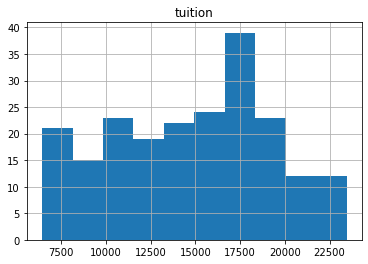

In [5]:
# Histogram
df.hist()

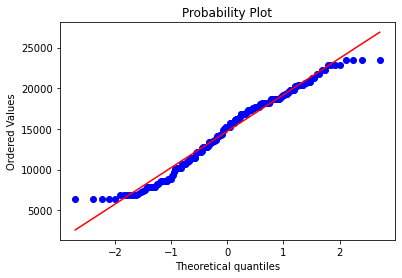

In [6]:
# Q-Q Plot
import matplotlib.pyplot as plt
import pylab 
import scipy.stats as stats

stats.probplot(df["tuition"], dist="norm", plot=pylab)
pylab.show()

array([[<AxesSubplot:xlabel='tuition', ylabel='tuition'>]], dtype=object)

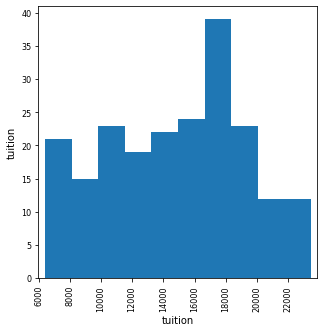

In [7]:
# Scatterplot Matrix
from pandas.plotting import scatter_matrix
scatter_matrix(df[['tuition']], # Make a scatter matrix of all columns (only tuition is continuous)
               figsize=(5, 5)) # Set plot size

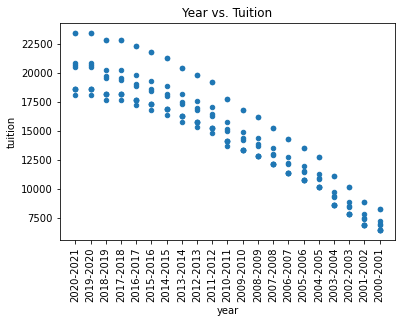

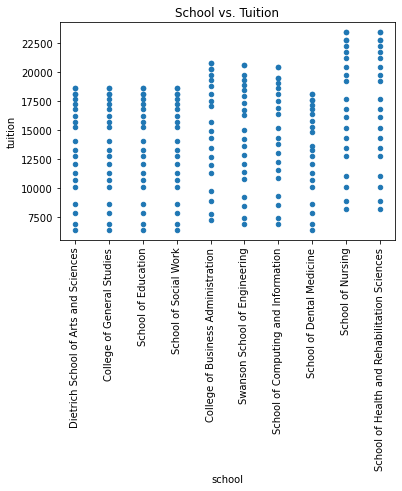

In [8]:
# Scatter Plot
df.plot(kind='scatter', x='year', y='tuition', title="Year vs. Tuition") # tuition over the years
_ = plt.xticks(rotation=90)
df.plot(kind='scatter', x='school', y='tuition', title="School vs. Tuition") # tuition in each school over 20 years (20 dots)
_ = plt.xticks(rotation=90)

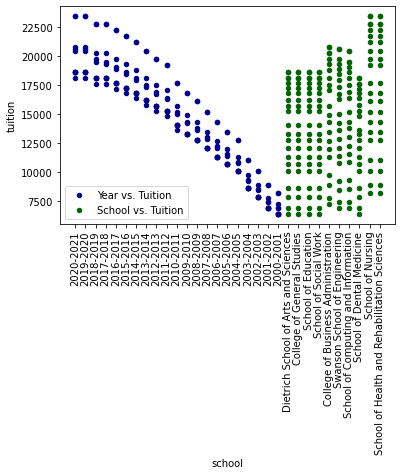

In [9]:
# both scatter plots combined 
ax = df.plot.scatter(x="year", y="tuition", color="DarkBlue", label="Year vs. Tuition")
df.plot.scatter(x="school", y="tuition", color="DarkGreen", label="School vs. Tuition", ax=ax);
_ = plt.xticks(rotation=90)

<AxesSubplot:ylabel='tuition'>

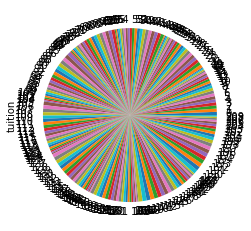

In [10]:
# Pie Charts
df["tuition"].plot.pie(y='tuition', subplots=False, figsize=(8, 4)) # pointless

<AxesSubplot:ylabel='year'>

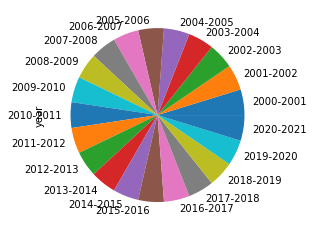

In [11]:
# for discrete data
df["year"].value_counts().sort_index().plot.pie(y='year', subplots=False, figsize=(8, 4))

<AxesSubplot:ylabel='school'>

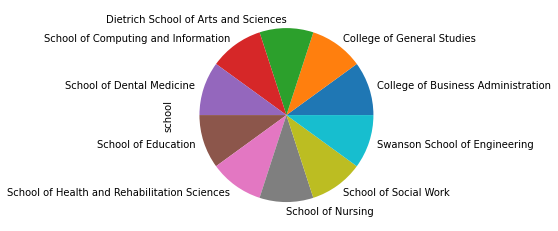

In [12]:
df["school"].value_counts().sort_index().plot.pie(y='school', subplots=False, figsize=(8, 4))

### Clean Up

In [13]:
# check for missing values
df.isnull().sum()
# no missing values

school     0
year       0
tuition    0
dtype: int64

<AxesSubplot:>

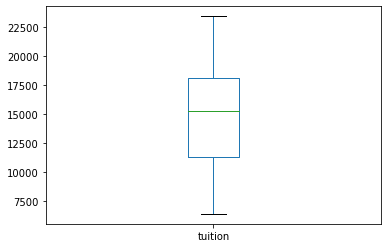

In [14]:
# check for outliers
df.plot.box()
# no outliers
# only plots tuition because it is the only continuous variable

<AxesSubplot:ylabel='Density'>

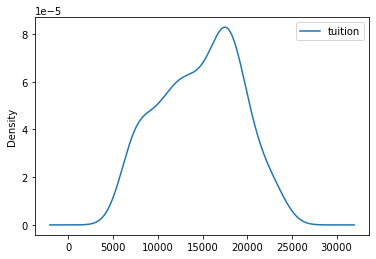

In [15]:
# check for any necessary centering, scaling, and/or transforming
df.plot.density()
# only plots tuition because it is the only continuous variable
# left skewed = needs centering and scaling

In [16]:
# center, scale, and transform continuous data
df_cont = df[['tuition']]
df_cont.head()

,tuition
0,18628
1,18628
2,18130
3,18130
4,17688


array([[<AxesSubplot:title={'center':'tuition'}>]], dtype=object)

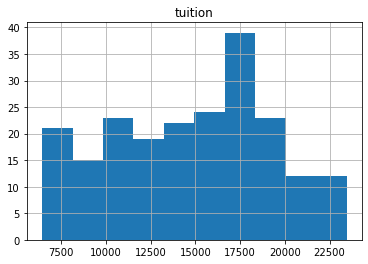

In [17]:
df_cont.hist()

In [18]:
from sklearn import preprocessing as prep
centered_scaled_data = prep.scale(df_cont)
centered_scaled_df = pd.DataFrame(centered_scaled_data, 
                                   index=df_cont.index,
                                   columns=df_cont.columns)
centered_scaled_df.describe()

,tuition
count,2.100000e+02
mean,-1.543739e-16
std,1.002389e+00
min,-1.853315e+00
25%,-7.590937e-01
50%,1.207669e-01
75%,7.582726e-01
max,1.945398e+00


array([[<AxesSubplot:title={'center':'tuition'}>]], dtype=object)

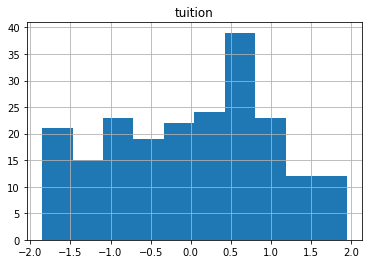

In [19]:
#double check centered and scaled distributions
centered_scaled_df.hist()

<AxesSubplot:>

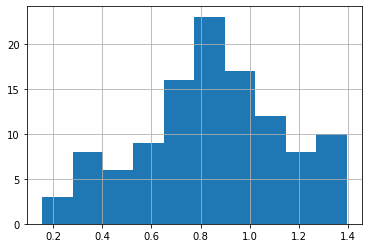

In [20]:
# double check transformed distribution
tuition_transformed = centered_scaled_df['tuition'].apply(np.sqrt)
tuition_transformed.hist()

### Feauture Statistics

In [21]:
df.mean()

tuition    14730.590476
dtype: float64

In [22]:
df.median()

tuition    15272.0
dtype: float64

In [23]:
df.std()

tuition    4493.809266
dtype: float64

In [24]:
df.min()

school     College of Business Administration
year                                2000-2001
tuition                                  6422
dtype: object

In [25]:
df.max()

school     Swanson School of Engineering
year                           2020-2021
tuition                            23452
dtype: object

In [26]:
# 3 columns (school, year, tuition)
# 189 rows (respective schools of each year and tuition)
df.shape

(210, 3)

In [27]:
# count rows (number of total values in each column)
df.count()

school     210
year       210
tuition    210
dtype: int64

In [28]:
# count columns (tuition of each year given the school)
df.value_counts()

school                                        year       tuition
Swanson School of Engineering                 2020-2021  20662      1
Dietrich School of Arts and Sciences          2010-2011  14076      1
School of Computing and Information           2013-2014  17490      1
                                              2012-2013  16940      1
                                              2011-2012  16448      1
                                                                   ..
School of Health and Rehabilitation Sciences  2010-2011  17720      1
                                              2009-2010  16798      1
                                              2008-2009  16152      1
                                              2007-2008  15238      1
College of Business Administration            2000-2001  7254       1
Length: 210, dtype: int64

### Define Predictor and Response Variables

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
def label_encode(df, columns):
    for col in columns:
        le = LabelEncoder()
        col_values_unique = list(df[col].unique())
        le_fitted = le.fit(col_values_unique)
 
        col_values = list(df[col].values)
        #le.classes_
        col_values_transformed = le.transform(col_values)
        df[col] = col_values_transformed

In [31]:
#define predictor and response variables
features = df[['school','year']] #predictor variables (encode discrete variables)

label_encode(features, features.columns.values)

target = df[['tuition']] #response variable
label_encode(target, target.columns.values)

<ipython-input-30-b6a57f620db9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = col_values_transformed


### Regression Models for Prediction of Future Costs

In [32]:
# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.20, random_state = 1)

### Simple Linear Regression (ŷ = α + Bx)

In [33]:
#train model
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(features_train, target_train)

LinearRegression()

In [34]:
#view coefficients of the model
for idx, col_name in enumerate(features_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for school is 0.6934204505914953
The coefficient for year is 4.919514397906755


In [35]:
#view intercepts of the model
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.3678575839005731


#### The linear regression model for school: ŷ = -0.3678 + 0.6934x
#### The linear regression model for year: ŷ = -0.3678 + 4.919x

### Calculate $R^{2}$ and RMSE scores

In [36]:
#calculate R^2 accuracy score
regression_model.score(features_test, target_test)

0.9167995254258253

#### Simple linear regression prediction is 91.6% accurate

In [37]:
#calculate SME score first
from sklearn.metrics import mean_squared_error
target_predict = regression_model.predict(features_test)
regression_model_mse = mean_squared_error(target_predict, target_test)
regression_model_mse
#then calculate RMSE score
import math
math.sqrt(regression_model_mse)

9.223758488604629

#### RSME score is 9.223

### Random Forest Regression

In [38]:
# Import the model we are using
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(features_train, target_train);

# Use the forest's predict method on the test data
target_pred = rf.predict(features_test)

#calculate accuracy
print(metrics.accuracy_score(target_test, target_pred.round()))

<ipython-input-38-970f700529e1>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(features_train, target_train);


0.07142857142857142


#### Random forest regression prediction is 7.14% accurate

### KNN Regression

In [39]:
from sklearn.neighbors import KNeighborsRegressor

# instantiate model
knn_model = KNeighborsRegressor(n_neighbors=7)

# fit model
knn_model.fit(features_train, target_train)

# make class predictions for the testing set
target_pred = knn_model.predict(features_test)

# calculate accuracy
print(metrics.accuracy_score(target_test, target_pred.round()))

0.09523809523809523


#### Knn regression prediction is 9.52% accurate